In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import copy

In [45]:
data, _ = make_blobs(n_samples=500 , centers=3, cluster_std=1.5, random_state=10)

In [46]:
data[:5]

array([[  2.75746837,   7.17456016],
       [  5.53633738,  -7.82436239],
       [ -0.15431056,   3.89980933],
       [  6.6669108 , -12.51672919],
       [  2.96366561,   5.79093028]])

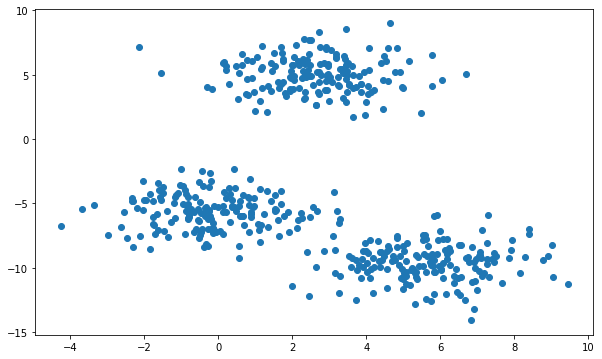

In [47]:
plt.figure(figsize=(10,6))
plt.scatter(data[:, 0], data[:,1])
plt.show()

##  1. Assign k random centroids


In [48]:
k = 3
centroid_x = np.random.randint(np.min(data) , np.max(data), size=k) 
centroid_y = np.random.randint(np.min(data) , np.max(data), size=k) 

In [49]:
centroids = np.array(list(zip(centroid_x,centroid_y)))

In [50]:
centroids

array([[-5, -2],
       [ 8,  2],
       [-7, -3]])

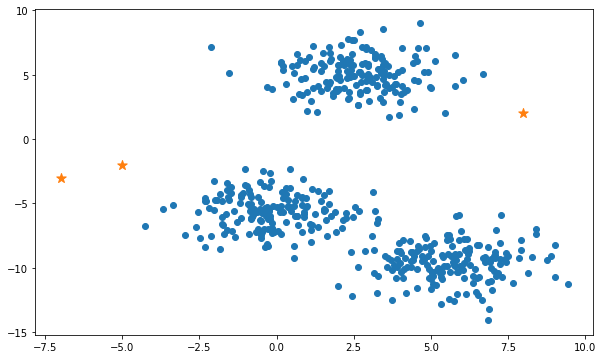

In [51]:
plt.figure(figsize=(10,6))
plt.scatter(data[:, 0], data[:,1])
plt.scatter(centroid_x, centroid_y, s=100, marker='*' )
plt.show()

In [52]:
def euclidean_dist(a,b,axis=1):
    return np.linalg.norm(a- b, axis=axis)

In [53]:
centroid_old = np.zeros_like(centroids)

In [54]:
centroid_old

array([[0, 0],
       [0, 0],
       [0, 0]])

In [55]:
clusters = np.zeros(len(data))

In [56]:
clusters

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [57]:
error = euclidean_dist(centroids, centroid_old, axis=None)

In [58]:
error

12.449899597988733

In [59]:
def plotData(clusters, centroids):
    colors = ['r','g','b']
    fig, ax = plt.subplots()
    for i in range(k):
        points = np.array([data[j] for j in range(len(data)) if clusters[j] == i])
        ax.scatter(points[:,0], points[:,1],s=10,c=colors[i])
    ax.scatter(centroids[:,0], centroids[:,1], marker='*', s=300, c='purple')
    plt.show()

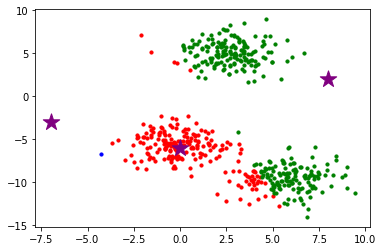

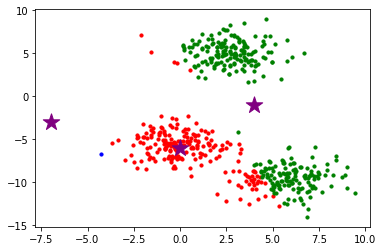

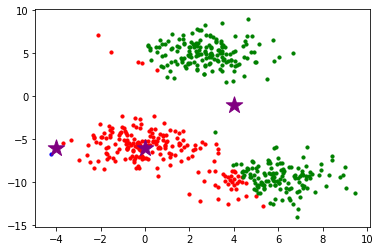

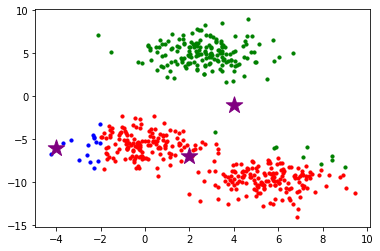

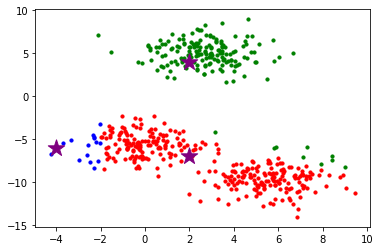

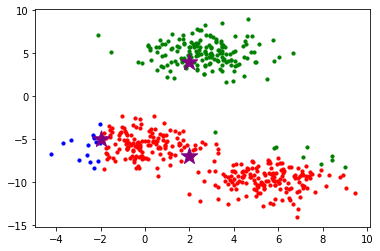

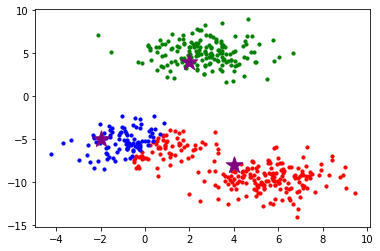

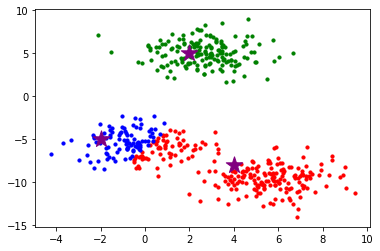

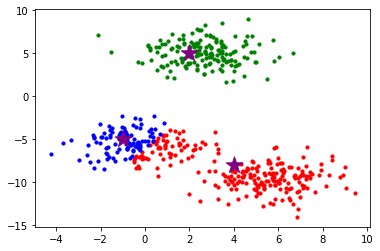

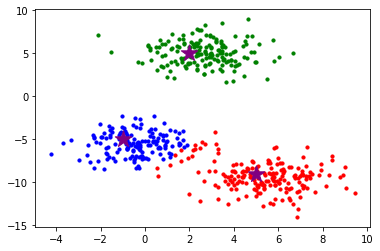

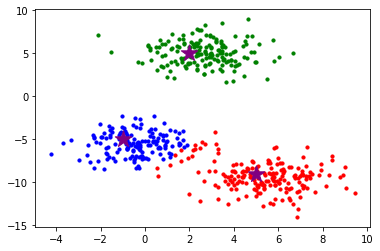

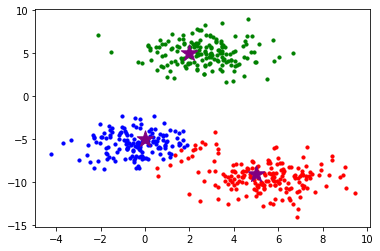

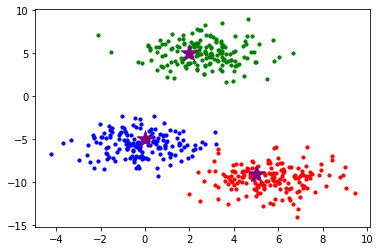

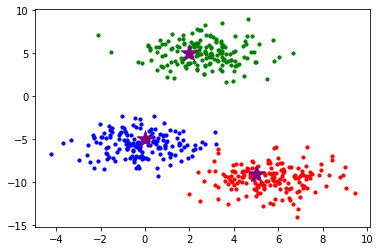

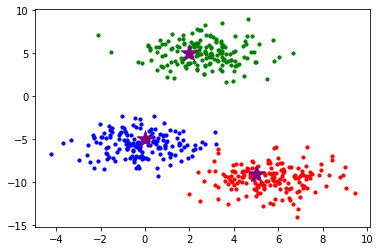

In [60]:
while error != 0:
    for i in range(len(data)):
        distances = euclidean_dist(data[i], centroids)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    centroids_old = copy.deepcopy(centroids)
    for i in range(k):
        points = [data[j] for j in range(len(data)) if clusters[j] == i]
        centroids[i] = np.mean(points, axis=0)
        plotData(clusters, centroids)
    error = euclidean_dist(centroids, centroids_old, axis=None)

In [61]:
clusters

array([1., 0., 1., 0., 1., 2., 1., 2., 2., 1., 0., 0., 0., 1., 1., 0., 1.,
       0., 1., 1., 2., 1., 2., 2., 0., 2., 2., 0., 1., 0., 1., 1., 2., 1.,
       1., 0., 1., 1., 2., 0., 0., 1., 0., 0., 2., 2., 0., 1., 2., 2., 1.,
       1., 0., 2., 0., 1., 2., 1., 0., 1., 2., 0., 1., 0., 0., 1., 1., 1.,
       0., 2., 0., 2., 2., 2., 1., 1., 1., 2., 0., 1., 1., 1., 0., 2., 1.,
       0., 2., 0., 1., 0., 1., 1., 1., 1., 2., 1., 1., 0., 1., 0., 1., 0.,
       2., 0., 2., 1., 2., 0., 2., 0., 0., 0., 0., 0., 1., 2., 0., 2., 0.,
       0., 2., 0., 1., 0., 0., 1., 0., 2., 0., 1., 1., 2., 1., 2., 2., 2.,
       1., 2., 2., 0., 1., 1., 0., 2., 1., 1., 0., 0., 1., 2., 2., 0., 2.,
       1., 0., 0., 0., 2., 1., 0., 0., 1., 2., 2., 1., 1., 1., 1., 1., 1.,
       2., 2., 1., 0., 0., 1., 2., 0., 1., 0., 1., 1., 1., 2., 0., 2., 2.,
       1., 2., 1., 0., 0., 2., 1., 2., 0., 0., 1., 1., 1., 0., 2., 2., 0.,
       1., 0., 1., 1., 1., 2., 2., 1., 0., 1., 1., 1., 0., 2., 2., 2., 2.,
       1., 2., 2., 0., 1.